<a href="https://colab.research.google.com/github/hsinha177/ML_IBM_COURSERA/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing important modules 
import numpy as np                  #for crating mask & performing mathematical operation over data set
import pandas as pd                 #reading data
import matplotlib.pyplot as plt     #for representation of outcome
from sklearn import linear_model    #for model training algo, simple linear reg.
from sklearn.metrics import r2_score#for error calculation

In [2]:
#downloading sample dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-25 11:26:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   238KB/s    in 0.3s    

2020-04-25 11:26:57 (238 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
#reading dataset
df = pd.read_csv("FuelConsumption.csv")  #reading dataset & creating data frame

In [4]:
#to see dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#data summerization
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#selecting specific heads from dataframe
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


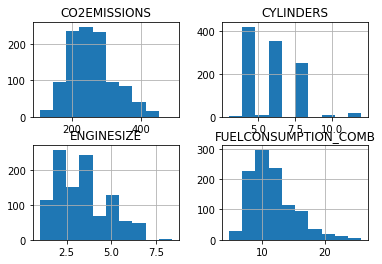

In [7]:
#Data visualization
vizu = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vizu.hist()
plt.show()

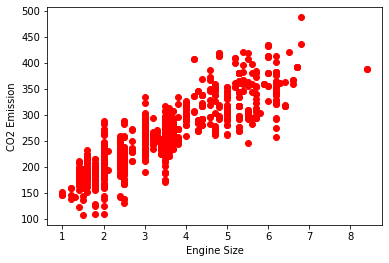

In [8]:
#plotting scatter graph of engine_size vs CO2Emission
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

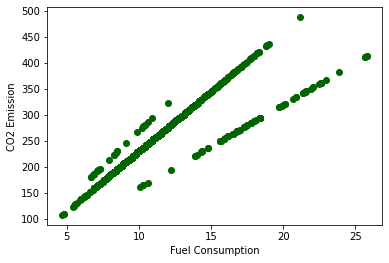

In [9]:
#plotting scatter graph of fuel_consumption vs CO2Emission
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color="#006400")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show()

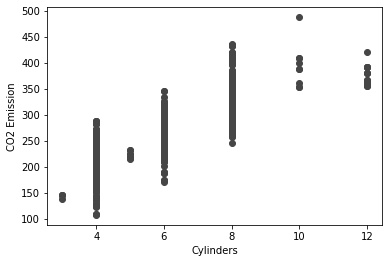

In [10]:
#CYLINDER vs the Emission graph:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="#464646")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

In [0]:
#splitting dataset for training & testing set
msk = np.random.rand(len(df)) < 0.7
train = cdf[msk]
test = cdf[~msk]

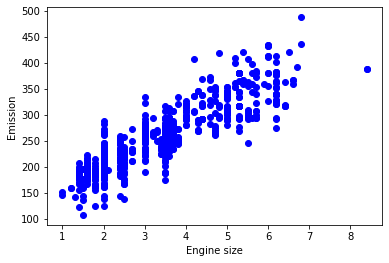

In [41]:
#plotting sepreted dataset [70:30 split]
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [42]:
#crating model. i.e., training & testing model
regm = linear_model.LinearRegression()
trainx = np.asanyarray(train[['ENGINESIZE']])
trainy = np.asanyarray(train[['CO2EMISSIONS']])
regm.fit(trainx, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#printing the cofficient & intercept for the regression
print("Cofficient = ",regm.coef_)
print("Intercept = ",regm.intercept_)

Cofficient =  [[38.51158091]]
Intercept =  [127.78555171]


Text(0, 0.5, 'Emission')

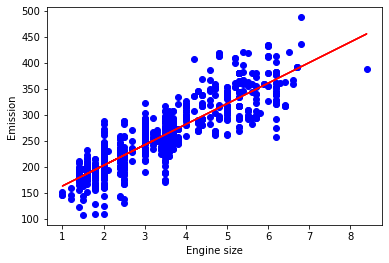

In [39]:
#plotting model o/p with 80% data trained & 20% for testing
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(trainx, regm.coef_[0][0]*trainx + regm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

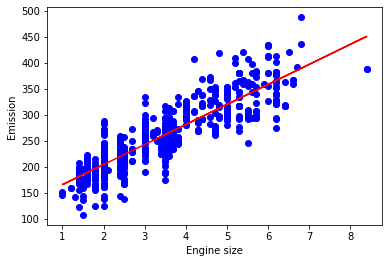

In [44]:
#plotting model o/p with 70% data trained & 30% data for testing
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(trainx, regm.coef_[0][0]*trainx + regm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [45]:
 #evaluation of model output
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.03
Residual sum of squares (MSE): 1015.38
R2-score: 0.64
